In [2]:
import torch
import torch.nn as nn

## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.

### Purpose of Training:

- The model will use the training data (`x_train` and `y_train`) to learn the relationship. It starts with random guesses for weight and bias and improves these guesses iteratively.
- The goal is for the model's learned weight and bias to be close to our known values of 0.7 (weight) and 0.3 (bias).

### Using the Model

#### Making Predictions:

- Once trained, we use the model to predict the outputs for `x_test`, and we can compare these predictions against the actual values `y_test` to see how well our model is performing.

<details>
<summary>Explanation of the Linear Regression Model in PyTorch</summary>

To dive deeper into the Linear Regression Model using PyTorch, let's break down what happens inside this model and how it relates to the typical workflow of training a model in PyTorch.

# 1. Model Definition

The `LinearRegressionModel` class is defined as a subclass of `nn.Module`, which is the base class for all neural network modules in PyTorch. Here's what happens inside:

## Initialization (`__init__` method):

- **Parameters:** We initialize two parameters, `weight` and `bias`, which are the core of the linear model. These parameters are initialized randomly and are set to be learnable (`requires_grad=True`), meaning PyTorch will adjust these during training to minimize the loss.

## Forward Pass (`forward` method):

- This method defines how the output is computed from the input data. For linear regression, the output `y` is calculated as `y = weight * x + bias`. This equation represents a line in two-dimensional space, where `weight` affects the slope, and `bias` adjusts the y-intercept.

</details>

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                  dtype=torch.float),
                                    requires_grad=True
                                   )
        self.bias = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                    requires_grad=True
                                   )
    def forward(self, x):
        return x * self.weight + self.bias

## PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).
For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module          | What does it do? |
|------------------------|------------------|
| `torch.nn`             | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| `torch.nn.Parameter`   | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [gradient descent](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)) are calculated automatically, this is often referred to as "autograd". |
| `torch.nn.Module`      | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires an implementation of `forward()`. |
| `torch.optim`          | Contains various optimization algorithms (these tell the model parameters within `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()`        | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of it like this, almost everything in a PyTorch neural network comes from `torch.nn`:

- `nn.Module` contains the larger building blocks (layers)
- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`s)
- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module(s)`
- `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

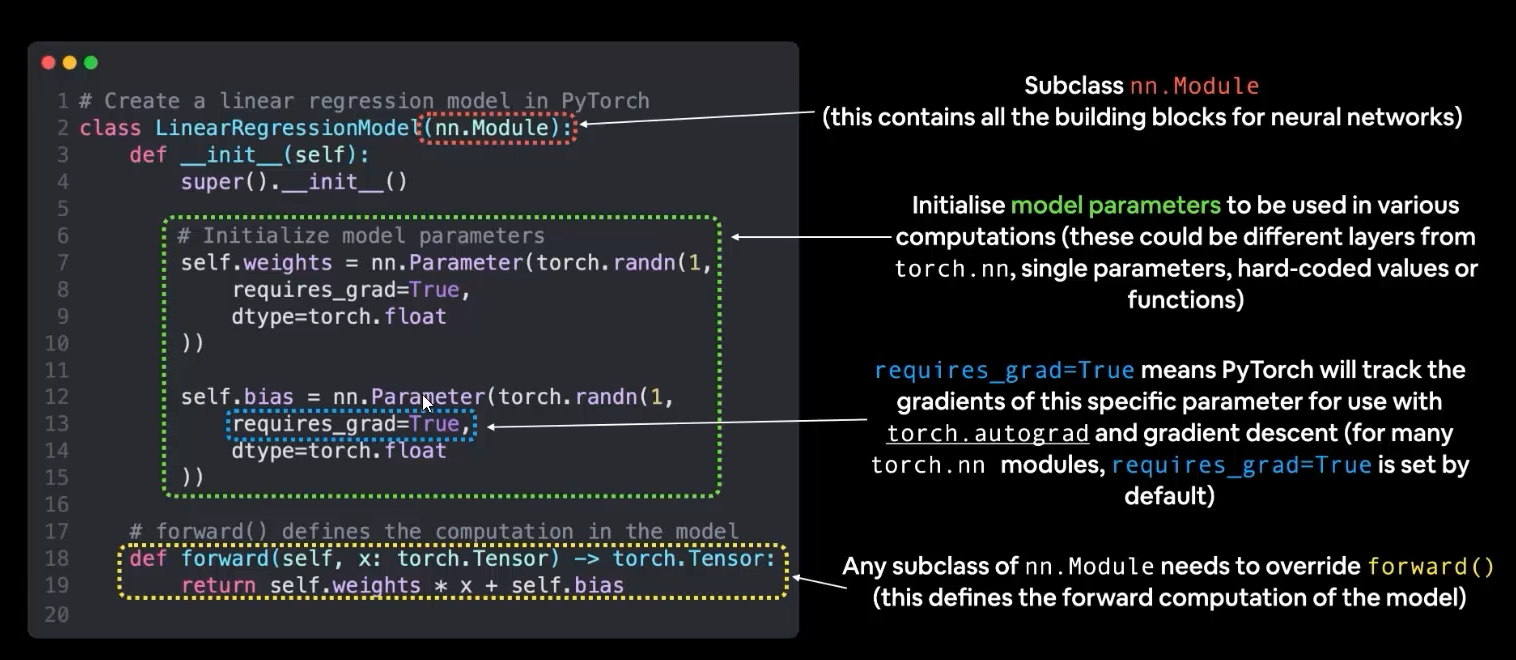

In [11]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making predictions using `torch.inference_mode()`

To check this we can pass it the test data `x_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Let's make some predictions.

In [14]:
X_test = torch.arange(0, 10, 0.02).unsqueeze(dim=1)
y_test = 0.7 * X_test + 0.3

In [15]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#     y_preds = model_0(x_test)

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster.

> **Note:** In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things, `torch.inference_mode()` is newer, potentially faster and preferred.

We've made some predictions, let's see what they look like.

In [17]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 500
Number of predictions made: 500
Predicted values:
tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588],
        [0.4655],
 

# **Thanks! Don't forget to Star the repo 🫡⭐**